In [1]:
import math
import numpy as np
from ROOT import gROOT, gDirectory, gPad, gSystem, gStyle
from ROOT import TCanvas, TFile, TProfile, TNtuple, TF1, TH1F, TH2F, THStack, TLegend, TGraphErrors, TMultiGraph, TText, TLatex
from ROOT import TGaxis, TCut
from ROOT import kWhite, kBlack, kGray, kRed, kGreen, kBlue, kYellow, kMagenta, kCyan, kOrange, kSpring, kTeal, kAzure, kViolet, kPink
# %jsroot on

Welcome to JupyROOT 6.18/00


In [2]:
gStyle.SetOptFit(0)
gStyle.SetOptStat(0)  
gStyle.SetOptTitle(1)
gStyle.SetTitleBorderSize(0)
gStyle.SetTitleStyle(0)
gStyle.SetMarkerSize(1)
gStyle.SetTitleX(0.2) 
gStyle.SetTitleY(0.9)
gStyle.SetPadLeftMargin(0.2)

In [3]:
# file1 = TFile.Open("/home/ilc/yokugawa/macros/QQbar250/analysis/ssbar/Polar/rootfiles/DQ_250GeV_dd.root")
file1 = TFile.Open("/home/ilc/yokugawa/macros/QQbar250/analysis/ssbar/Polar/rootfiles/DQ_250GeV_dd.400.maxp20.root")


In [4]:
def makePretty(p, color):
    p.SetStats(0)
    p.SetMarkerColor(color)
    p.SetLineColor(color)
    p.SetFillColor(color)
    p.SetFillStyle(3003)
    p.SetMarkerStyle(1)
    p.SetMarkerSize(0.2)
    p.SetTitle("")

def GetKeyNames( self, dir = "" ):
        self.cd(dir)
        return [key.GetName() for key in gDirectory.GetListOfKeys()]
    
def Normal(h1):
    h1.Scale(1.0/h1.Integral("width"))
#     h1.Scale(1.0/h1.GetEntries())

In [5]:
TFile.GetKeyNames = GetKeyNames
keyList = file1.GetKeyNames()
print(keyList)

['h_mc_stable_nKaons_evt', 'h_mc_stable_Kaon_cos', 'h_mc_quark_cos', 'h_mc_quark_sep', 'h_mc_quark_m', 'h_mc_quark_pp', 'h_mc_quark_pz', 'h_mc_quark_E', 'h_mc_quark_p', 'h_mc_stable_isr_p', 'h_pfo_Kaon_cos', 'h_pfo_LeadKaons_abscos', 'h_pfo_LeadKaons_cos', 'h_pfo_LeadKaons_cosAdd', 'h_pfo_LeadK_phiDiff', 'h_pfo_k_mult_jet', 'h_pfo_jet_angdiff', 'h_pfo_jet_mult', 'h_pfo_jet_mult_uu', 'h_pfo_jet_mult_dd', 'h_pfo_jet_mult_ss', 'h_pfo_jet_LeadK_cos', 'h_pfo_jet_charge', 'h_pfo_jet_charge_u', 'h_pfo_jet_charge_ubar', 'h_pfo_jet_charge_d', 'h_pfo_jet_charge_dbar', 'h_pfo_jet_charge_s', 'h_pfo_jet_charge_sbar', 'h_pfo_q_match_charge', 'h_pfo_qbar_match_charge', 'h_pfo_LeadK_q_match_charge', 'h_pfo_LeadK_qbar_match_charge', 'h_pfo_LeadK_p', 'h_pfo_LeadK_p_10']


In [6]:
h_mc_quark_cos = file1.Get("h_mc_quark_cos")
h_pfo_LeadKaons_cos = file1.Get("h_pfo_LeadKaons_cos")

makePretty(h_mc_quark_cos,kBlack)
makePretty(h_pfo_LeadKaons_cos,kBlue)

### Flip the Histogram (d -> K+Pi)

In [7]:
nbinsX = h_mc_quark_cos.GetNbinsX()
h_mc_quark_cos_flip = TH1F("h_mc_quark_cos_flip",";cos#theta;Entries (Norm.)",100,-1.0,1.0)
makePretty(h_mc_quark_cos_flip,kBlack)

for binX in range(1,nbinsX+1):
    binContent = h_mc_quark_cos.GetBinContent(binX)
    binX_flip = nbinsX+1 - binX
    h_mc_quark_cos_flip.SetBinContent(binX_flip,binContent)

In [8]:
Normal(h_mc_quark_cos_flip)
Normal(h_pfo_LeadKaons_cos)

In [9]:
c1 = TCanvas("c1","c1",500,500)

In [10]:
h_mc_quark_cos.GetXaxis().SetTitle("cos#theta_{d,K^{-}}");

h_mc_quark_cos_flip.Rebin(2)
h_pfo_LeadKaons_cos.Rebin(2)

h_mc_quark_cos_flip.Draw("h")
h_pfo_LeadKaons_cos.Draw("hsame")

In [11]:
leg = TLegend(0.65,0.85,0.9,0.65,"","brNDC")
leg.SetFillColor(kWhite)
leg.SetBorderSize(0)
leg.SetTextSize(0.03)
leg.AddEntry(h_mc_quark_cos_flip,"Parton Level dd","fp")
leg.AddEntry(h_pfo_LeadKaons_cos,"LeadK Reco","fp")
leg.Draw()

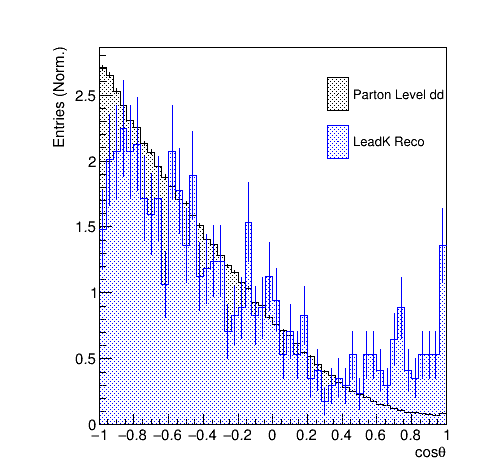

In [12]:
c1.Draw()

## Appendix

### Legend
```python
leg = TLegend(0.65,0.85,0.9,0.65,"","brNDC")
leg.SetFillColor(kWhite)
leg.SetBorderSize(0)
leg.SetTextSize(0.035)
leg.AddEntry(h_pfo_nKaons_evt,"All","fp")
leg.AddEntry(h_pfo_nKaons_evt_uu,"u#bar{u}","fp")
leg.AddEntry(h_pfo_nKaons_evt_ss,"s#bar{s}","fp")
leg.Draw()
```